In [1]:
from Modele import Modele
from Optimiseur import Optimiseur
import numpy as np
import matplotlib.pyplot as plt

In [182]:
# Load the dataset
data = np.load('ckn_mnist.npz')

# Access the arrays in the dataset
images = data['X']
labels = data['y']
# Binarization of the labels
labels = np.where(labels < 5, -1, 1)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

n=1000

x_values = np.random.randint(0, images.shape[0] - n, size=10)
x=0
# Take only n images for training
images = images[x:x+n]
labels = labels[x:x+n]
# Separet the dataset into training and testing
n_train = int(n*0.8)
train_images = images[:n_train]
train_labels = labels[:n_train]
test_images = images[n_train:]
test_labels = labels[n_train:]

# Reshape the images to 2D
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels.reshape(-1)
y_test = test_labels.reshape(-1)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Images shape: (60000, 2304)
Labels shape: (60000, 1)
Training data shape:  (800, 2304)
Test data shape:  (200, 2304)


In [183]:
gammas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
alphas = []
train_loss = []
train_accuracy = []
test_accuracy = []

for gamma in gammas:
    modele = Modele(0,gamma)
    alpha = modele.alpha_opt(X_train,y_train,gamma)
    alphas.append(alpha)
    train_loss.append(modele.loss_function(X_train,y_train,alpha))
    train_accuracy.append(modele.accuracy(X_train,X_train,y_train,alpha))
    test_accuracy.append(modele.accuracy(X_train,X_test,y_test,alpha))

In [184]:
best_test = np.where(test_accuracy == np.max(test_accuracy))[0]
best_train = np.where(train_accuracy == np.max(train_accuracy))[0]

print("best gamma range for train: ", [gammas[i] for i in best_train])
print("best gamma range for test: ", [gammas[i] for i in best_test])

best gamma range for train:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
best gamma range for test:  [1]


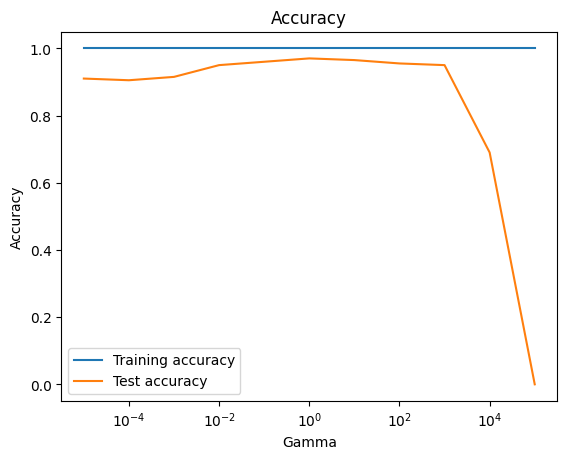

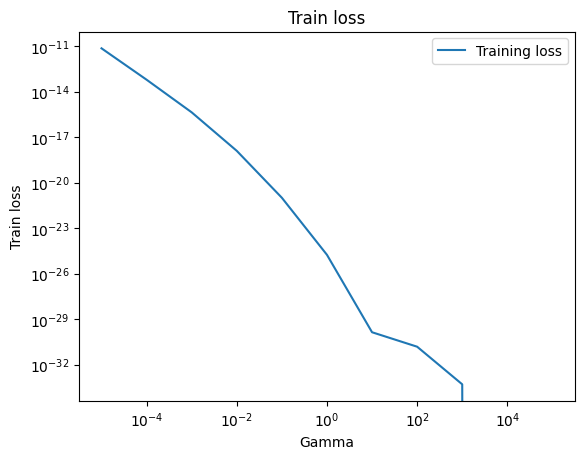

In [185]:
plt.figure()
plt.plot(gammas,train_accuracy, label='Training accuracy')
plt.plot(gammas,test_accuracy, label='Test accuracy')
plt.xlabel('Gamma')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(gammas,train_loss, label='Training loss')
plt.xlabel('Gamma')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Train loss')
plt.title('Train loss')
plt.legend()
plt.show()


In [186]:
gammas = np.linspace(1e-2,1e2,50)
alphas = []
train_loss = []
train_accuracy = []
test_accuracy = []

for gamma in gammas:
    modele = Modele(0,gamma)
    alpha = modele.alpha_opt(X_train,y_train,gamma)
    alphas.append(alpha)
    train_loss.append(modele.loss_function(X_train,y_train,alpha))
    train_accuracy.append(modele.accuracy(X_train,X_train,y_train,alpha))
    test_accuracy.append(modele.accuracy(X_train,X_test,y_test,alpha))

In [187]:
best_test = np.where(test_accuracy == np.max(test_accuracy))[0]
best_train = np.where(train_accuracy == np.max(train_accuracy))[0]

print("best gamma range for train: ", [gammas[i] for i in best_train])
print("best gamma range for test: ", [gammas[i] for i in best_test])

best gamma range for train:  [np.float64(0.01), np.float64(2.050612244897959), np.float64(4.091224489795918), np.float64(6.131836734693877), np.float64(8.172448979591836), np.float64(10.213061224489795), np.float64(12.253673469387754), np.float64(14.294285714285714), np.float64(16.334897959183674), np.float64(18.375510204081632), np.float64(20.416122448979593), np.float64(22.456734693877554), np.float64(24.49734693877551), np.float64(26.53795918367347), np.float64(28.57857142857143), np.float64(30.61918367346939), np.float64(32.659795918367344), np.float64(34.7004081632653), np.float64(36.74102040816326), np.float64(38.78163265306122), np.float64(40.82224489795918), np.float64(42.86285714285714), np.float64(44.9034693877551), np.float64(46.94408163265306), np.float64(48.98469387755102), np.float64(51.025306122448974), np.float64(53.06591836734693), np.float64(55.106530612244896), np.float64(57.14714285714285), np.float64(59.18775510204081), np.float64(61.228367346938775), np.float64(63

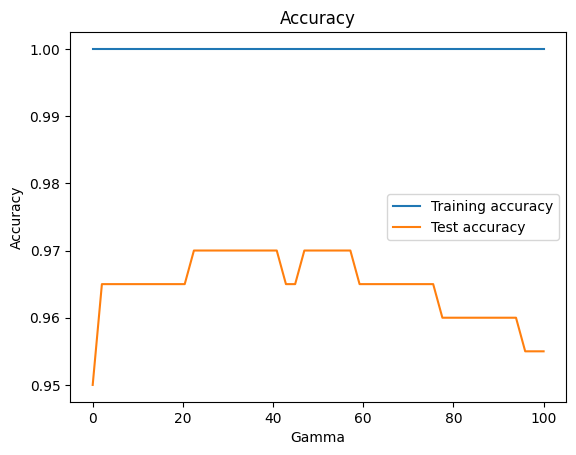

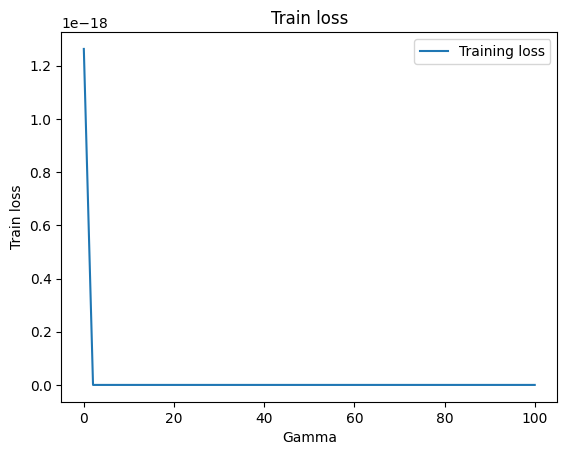

In [188]:
plt.figure()
plt.plot(gammas,train_accuracy, label='Training accuracy')
plt.plot(gammas,test_accuracy, label='Test accuracy')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(gammas,train_loss, label='Training loss')
plt.xlabel('Gamma')
plt.ylabel('Train loss')
plt.title('Train loss')
plt.legend()
plt.show()

In [189]:
gammas = np.linspace(20,70,50)
alphas = []
train_loss = []
train_accuracy = []
test_accuracy = []

for gamma in gammas:
    modele = Modele(0,gamma)
    alpha = modele.alpha_opt(X_train,y_train,gamma)
    alphas.append(alpha)
    train_loss.append(modele.loss_function(X_train,y_train,alpha))
    train_accuracy.append(modele.accuracy(X_train,X_train,y_train,alpha))
    test_accuracy.append(modele.accuracy(X_train,X_test,y_test,alpha))

In [190]:
best_test = np.where(test_accuracy == np.max(test_accuracy))[0]
best_train = np.where(train_accuracy == np.max(train_accuracy))[0]

print("best gamma range for train: ", [gammas[i] for i in best_train])
print("best gamma range for test: ", [gammas[i] for i in best_test])

best gamma range for train:  [np.float64(20.0), np.float64(21.020408163265305), np.float64(22.040816326530614), np.float64(23.06122448979592), np.float64(24.081632653061224), np.float64(25.10204081632653), np.float64(26.122448979591837), np.float64(27.142857142857142), np.float64(28.163265306122447), np.float64(29.183673469387756), np.float64(30.20408163265306), np.float64(31.224489795918366), np.float64(32.244897959183675), np.float64(33.265306122448976), np.float64(34.285714285714285), np.float64(35.30612244897959), np.float64(36.326530612244895), np.float64(37.3469387755102), np.float64(38.36734693877551), np.float64(39.38775510204081), np.float64(40.40816326530612), np.float64(41.42857142857143), np.float64(42.44897959183673), np.float64(43.46938775510204), np.float64(44.48979591836735), np.float64(45.51020408163265), np.float64(46.53061224489796), np.float64(47.55102040816327), np.float64(48.57142857142857), np.float64(49.59183673469388), np.float64(50.61224489795919), np.float64(

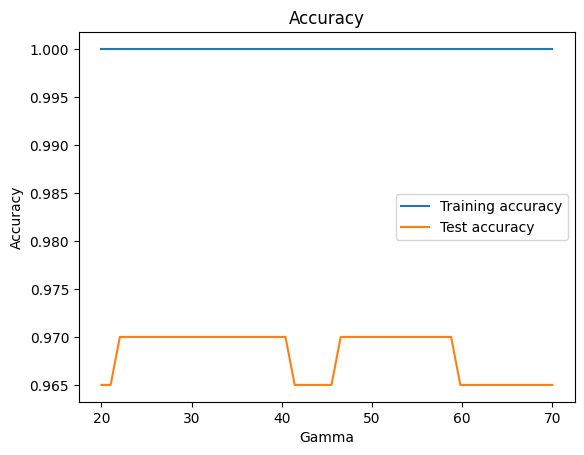

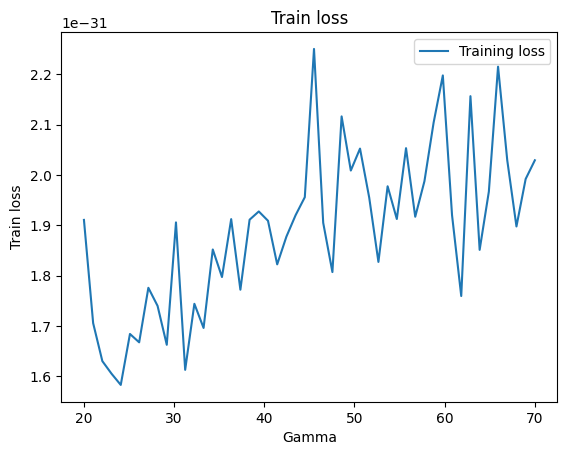

In [191]:
plt.figure()
plt.plot(gammas,train_accuracy, label='Training accuracy')
plt.plot(gammas,test_accuracy, label='Test accuracy')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(gammas,train_loss, label='Training loss')
plt.xlabel('Gamma')
plt.ylabel('Train loss')
plt.title('Train loss')
plt.legend()
plt.show()

In [19]:
print("best gamma:",25)

best gamma: 25


In [192]:
modele = Modele(0,gamma=30)
optimiseur = Optimiseur(modele)

gamma = 30
alpha = modele.alpha_opt(X_train,y_train,gamma)

print("train loss for best gamma:",modele.loss_function(X_train, y_train, alpha))
print("train accuracy for best gamma:",modele.accuracy(X_train, X_train, y_train, alpha))
print("norm of the gradient for best gamma:",np.linalg.norm(modele.gradient(X_train, y_train, alpha)))
print("test loss for best gamma:",modele.test_loss_function(X_train,X_test, y_test, alpha))
print("test accuracy for best gamma:",modele.accuracy(X_train, X_test, y_test, alpha))

train loss for best gamma: 1.761301452741015e-31
train accuracy for best gamma: 1.0
norm of the gradient for best gamma: 2.960626109883664e-17
test loss for best gamma: 0.20595948192093866
test accuracy for best gamma: 0.97


In [119]:
L,mu = modele.constante_L(X_train)

x_init = np.random.rand(X_train.shape[0])

alpha,alpha_list = optimiseur.gradient_descent(X_train,y_train,x_init,1/L,5000, 1.761301452741015e-31,"loss")

In [120]:
print("number of iterations:",len(alpha_list))
print("train loss for best alpha:",modele.loss_function(X_train, y_train, alpha))
print("train accuracy for best alpha:",modele.accuracy(X_train, X_train, y_train, alpha))
print("norm of the gradient for best alpha:",np.linalg.norm(modele.gradient(X_train, y_train, alpha)))
print("test loss for best alpha:",modele.test_loss_function(X_train,X_test, y_test, alpha))
print("test accuracy for best alpha:",modele.accuracy(X_train, X_test, y_test, alpha))

number of iterations: 2496
train loss for best alpha: 1.7587592252144239e-31
train accuracy for best alpha: 1.0
norm of the gradient for best alpha: 3.114620282706977e-17
test loss for best alpha: 0.26946447128882667
test accuracy for best alpha: 0.95


In [42]:
L,mu = modele.constante_L(X_train)

x_init = np.random.rand(X_train.shape[0])

alpha,alpha_list = optimiseur.gradient_descent(X_train,y_train,x_init,1/L,1000, 2e-2,"norm")

In [43]:
print("train loss for best alpha:",modele.loss_function(X_train, y_train, alpha))
print("train accuracy for best alpha:",modele.accuracy(X_train, X_train, y_train, alpha))
print("norm of the gradient for best alpha:",np.linalg.norm(modele.gradient(X_train, y_train, alpha)))
print("test loss for best alpha:",modele.test_loss_function(X_train,X_test, y_test, alpha))
print("test accuracy for best alpha:",modele.accuracy(X_train, X_test, y_test, alpha))

train loss for best alpha: 0.10032925304303664
train accuracy for best alpha: 0.95125
norm of the gradient for best alpha: 0.01863618572464189
test loss for best alpha: 0.24182228712207945
test accuracy for best alpha: 0.93


7
7
6
6
6
6
6
6
6
8
10
8
7
7
6
6
6
6
5
5
6
6
6
6
6
5
5
5
6
6
7
11
73
7
7
6
6
6
5
5
5
5
5
6
7
7
7
6
6
6
5
5
5
5
5
7
7
6
6
6
5
6
6
7
9
43
6
6
6
5
5
5
6
6
8
11
78
8
7
7
6
6
6
6
7
9
13
110
8
7
7
7
6
6
6
6
6
7
12
7
7
6
6
6
6
6
6
7
8
13


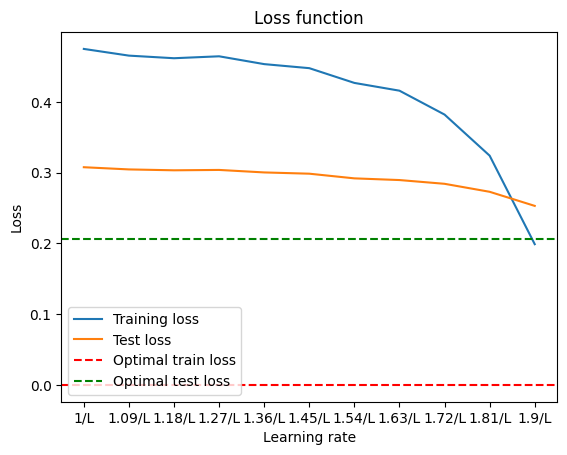

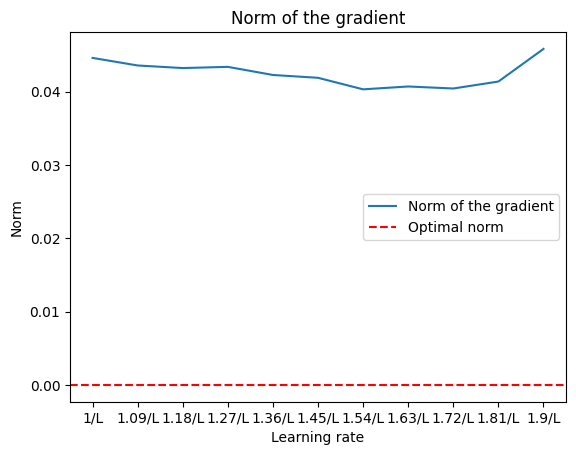

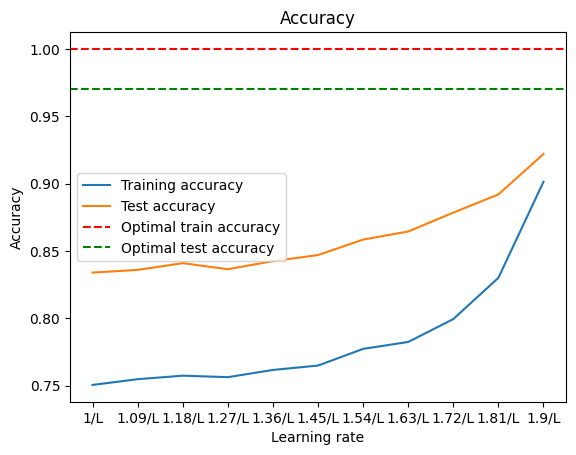

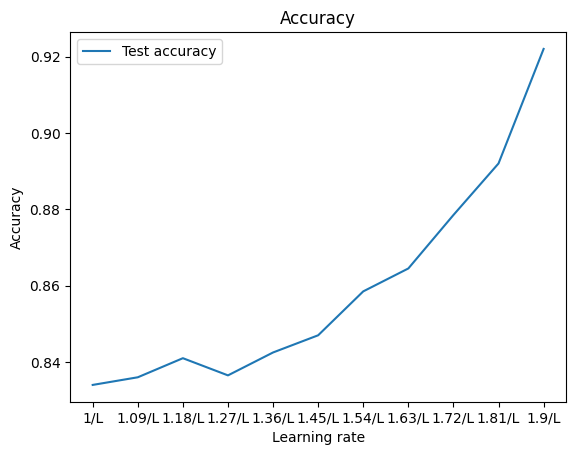

In [215]:
modele = Modele(0,30)
optimiseur = Optimiseur(modele)
max_iters=5000
target=0.05
#0.01: convergence for the test accuracy, convergence for the train accuracy and loss for 1.9/L
#0.02: not too bad, test accuracy augmente avec valeur de step size, converge pour 1.9/L, loss almost converge for 1.9/L 
#-> trainning loss: between 0.15 and 0.03, test loss: between 0.3 and 0.2, 
# train accuracy: between 0.93 and 1, test accuracy: between 0.95 and 0.97
#0.05: see augmentation of the test accuracy but no convergence
criterion='norm'
np.random.seed(0)
initializations = [np.random.randn(X_train.shape[0]) for _ in range(10)]
training_loss_mean = np.zeros(11)
test_loss_mean = np.zeros(11)
norms_mean = np.zeros(11)
train_accuracies_mean = np.zeros(11)
test_accuracies_mean = np.zeros(11)
for i in range(10):
    init= initializations[i]
    L,mu = modele.constante_L(X_train)
    learning_rates = np.linspace(1/L,1.99/L,11)
    
    training_loss = []
    test_loss = []
    norms = []
    train_accuracies = []
    test_accuracies = []
    for lr in learning_rates: 
        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), lr, max_iters, target, criterion)
        training_loss.append(modele.loss_function(X_train, y_train, alpha))
        test_loss.append(modele.test_loss_function(X_train, X_test, y_test, alpha))
        norms.append(np.linalg.norm(modele.gradient(X_train, y_train, alpha)))
        train_accuracies.append(modele.accuracy(X_train, X_train, y_train, alpha))
        test_accuracies.append(modele.accuracy(X_train, X_test, y_test, alpha))
        print(len(alpha_list))
    
    training_loss_mean += training_loss
    test_loss_mean += test_loss
    norms_mean += norms
    train_accuracies_mean += train_accuracies
    test_accuracies_mean += test_accuracies
training_loss_mean /= 10
test_loss_mean /= 10
norms_mean /= 10
train_accuracies_mean /= 10
test_accuracies_mean /= 10
x_array = ["1/L","1.09/L","1.18/L","1.27/L","1.36/L","1.45/L","1.54/L","1.63/L","1.72/L","1.81/L","1.9/L"]

alpha_opt = modele.alpha_opt(X_train, y_train, 25)
train_loss_opt = modele.loss_function(X_train, y_train, alpha_opt)
train_accuracy_opt = modele.accuracy(X_train, X_train, y_train, alpha_opt)
test_accuracy_opt = modele.accuracy(X_train, X_test, y_test, alpha_opt)
norm_opt = np.linalg.norm(modele.gradient(X_train, y_train, alpha_opt))
test_loss_opt = modele.test_loss_function(X_train, X_test, y_test, alpha_opt)                          

plt.figure()
plt.plot(x_array,training_loss_mean, label='Training loss')
plt.plot(x_array,test_loss_mean, label='Test loss')
plt.axhline(y=train_loss_opt, color='r', linestyle='--', label='Optimal train loss')
plt.axhline(y=test_loss_opt, color='g', linestyle='--', label='Optimal test loss')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Loss function')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,norms_mean, label='Norm of the gradient')
plt.axhline(y=norm_opt, color='r', linestyle='--', label='Optimal norm')
plt.xlabel('Learning rate')
plt.ylabel('Norm')
plt.title('Norm of the gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,train_accuracies_mean, label='Training accuracy')
plt.plot(x_array,test_accuracies_mean, label='Test accuracy')
plt.axhline(y=train_accuracy_opt, color='r', linestyle='--', label='Optimal train accuracy')
plt.axhline(y=test_accuracy_opt, color='g', linestyle='--', label='Optimal test accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(x_array,test_accuracies_mean, label='Test accuracy')
#plt.axhline(y=test_accuracy_opt, color='g', linestyle='--', label='Optimal test accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()



5
4
4
4
4
4
4
3
4
4
4
5
5
4
4
4
4
4
3
3
3
3
4
4
3
3
3
3
3
3
3
3
4
5
4
4
4
4
3
3
3
3
3
3
5
5
4
4
4
4
4
3
3
3
3
4
4
4
4
3
3
3
3
3
3
4
4
4
4
4
4
3
3
4
4
4
5
5
5
4
4
4
4
4
4
4
5
6
6
5
5
5
4
4
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4


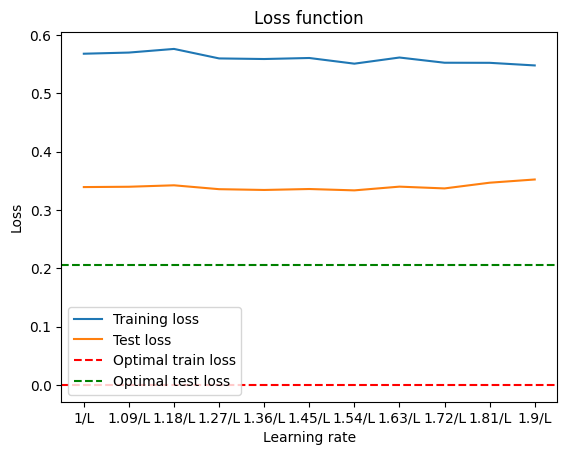

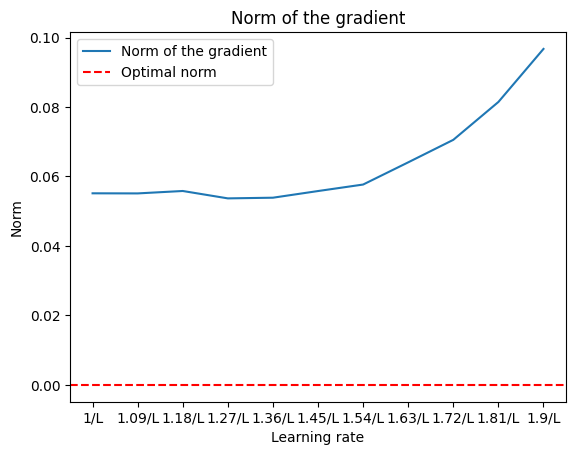

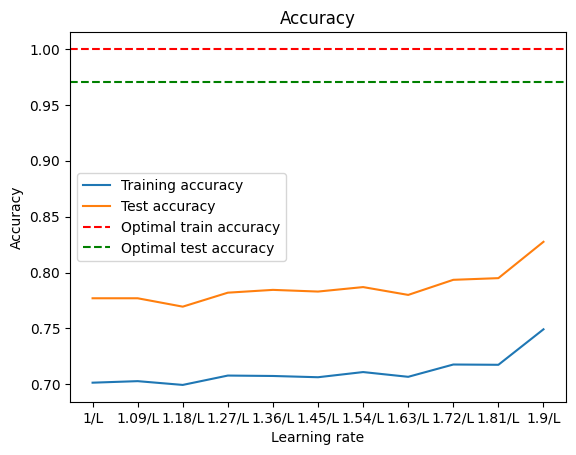

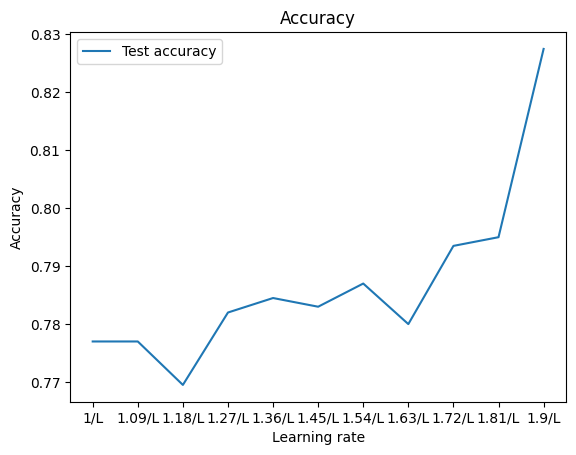

In [218]:
modele = Modele(0,30)
optimiseur = Optimiseur(modele)
max_iters=5000
target= 0.6
#0.15: better test accuracy than optimal (0.98)
criterion='loss'
np.random.seed(0)
initializations = [np.random.randn(X_train.shape[0]) for _ in range(10)]
training_loss_mean = np.zeros(11)
test_loss_mean = np.zeros(11)
norms_mean = np.zeros(11)
train_accuracies_mean = np.zeros(11)
test_accuracies_mean = np.zeros(11)
for i in range(10):
    init= initializations[i]
    L,mu = modele.constante_L(X_train)
    learning_rates = np.linspace(1/L,1.99/L,11)
    
    training_loss = []
    test_loss = []
    norms = []
    train_accuracies = []
    test_accuracies = []
    for lr in learning_rates: 
        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), lr, max_iters, target, criterion)
        training_loss.append(modele.loss_function(X_train, y_train, alpha))
        test_loss.append(modele.test_loss_function(X_train, X_test, y_test, alpha))
        norms.append(np.linalg.norm(modele.gradient(X_train, y_train, alpha)))
        train_accuracies.append(modele.accuracy(X_train, X_train, y_train, alpha))
        test_accuracies.append(modele.accuracy(X_train, X_test, y_test, alpha))
        print(len(alpha_list))
    
    training_loss_mean += training_loss
    test_loss_mean += test_loss
    norms_mean += norms
    train_accuracies_mean += train_accuracies
    test_accuracies_mean += test_accuracies
training_loss_mean /= 10
test_loss_mean /= 10
norms_mean /= 10
train_accuracies_mean /= 10
test_accuracies_mean /= 10
x_array = ["1/L","1.09/L","1.18/L","1.27/L","1.36/L","1.45/L","1.54/L","1.63/L","1.72/L","1.81/L","1.9/L"]

alpha_opt = modele.alpha_opt(X_train, y_train, 25)
train_loss_opt = modele.loss_function(X_train, y_train, alpha_opt)
train_accuracy_opt = modele.accuracy(X_train, X_train, y_train, alpha_opt)
test_accuracy_opt = modele.accuracy(X_train, X_test, y_test, alpha_opt)
norm_opt = np.linalg.norm(modele.gradient(X_train, y_train, alpha_opt))
test_loss_opt = modele.test_loss_function(X_train, X_test, y_test, alpha_opt)                          

plt.figure()
plt.plot(x_array,training_loss_mean, label='Training loss')
plt.plot(x_array,test_loss_mean, label='Test loss')
plt.axhline(y=train_loss_opt, color='r', linestyle='--', label='Optimal train loss')
plt.axhline(y=test_loss_opt, color='g', linestyle='--', label='Optimal test loss')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Loss function')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,norms_mean, label='Norm of the gradient')
plt.axhline(y=norm_opt, color='r', linestyle='--', label='Optimal norm')
plt.xlabel('Learning rate')
plt.ylabel('Norm')
plt.title('Norm of the gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,train_accuracies_mean, label='Training accuracy')
plt.plot(x_array,test_accuracies_mean, label='Test accuracy')
plt.axhline(y=train_accuracy_opt, color='r', linestyle='--', label='Optimal train accuracy')
plt.axhline(y=test_accuracy_opt, color='g', linestyle='--', label='Optimal test accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(x_array,test_accuracies_mean, label='Test accuracy')
#plt.axhline(y=test_accuracy_opt, color='g', linestyle='--', label='Optimal test accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()



156
295
56
104
33
60
7
7
4
3
1
1
1
1


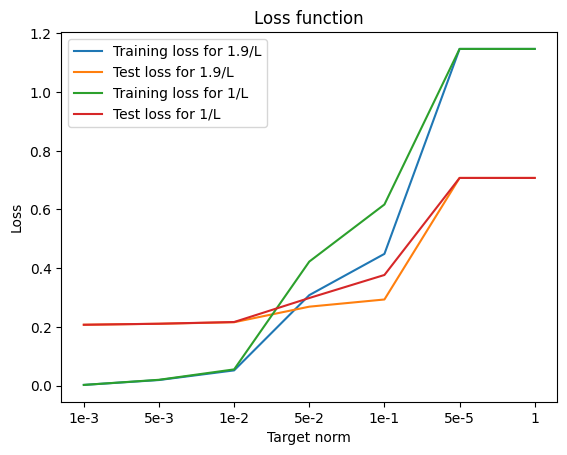

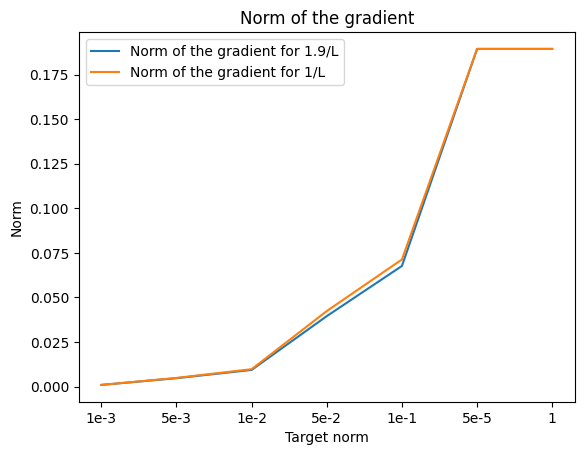

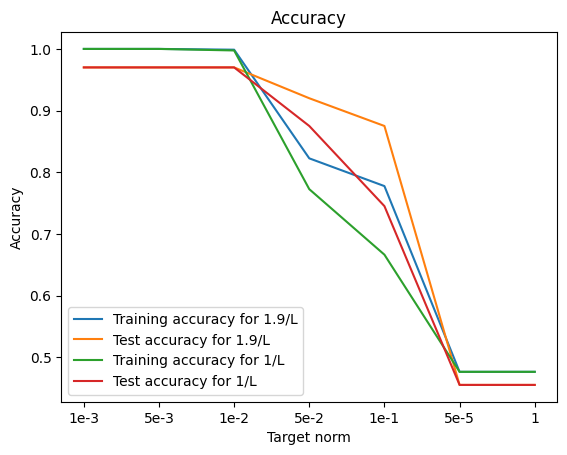

In [212]:
model = Modele(0,30)
optimiseur = Optimiseur(model)
max_iters=2000
targets = [1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1]
criterion='norm'
initializations = [np.random.randn(n) for _ in range(10)]
training_loss_mean = np.zeros(7)
test_loss_mean = np.zeros(7)
norms_mean = np.zeros(7)
train_accuracies_mean = np.zeros(7)
test_accuracies_mean = np.zeros(7)

training_loss_mean_2 = np.zeros(7)
test_loss_mean_2 = np.zeros(7)
norms_mean_2 = np.zeros(7)
train_accuracies_mean_2 = np.zeros(7)
test_accuracies_mean_2 = np.zeros(7)

for i in range(1):
    init= np.random.randn(X_train.shape[0]) 
    L,mu = model.constante_L(X_train)
    learning_rates = np.linspace(1/L,1.99/L,11)
    
    training_loss = []
    test_loss = []
    norms = []
    train_accuracies = []
    test_accuracies = []
    training_loss_2 = []
    test_loss_2 = []
    norms_2 = []
    train_accuracies_2 = []
    test_accuracies_2 = []

    for target in targets: 
        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1.9/L, max_iters, target, criterion)
        training_loss.append(model.loss_function(X_train, y_train, alpha))
        test_loss.append(model.test_loss_function(X_train, X_test, y_test, alpha))
        norms.append(np.linalg.norm(model.gradient(X_train, y_train, alpha)))
        train_accuracies.append(model.accuracy(X_train, X_train, y_train, alpha))
        test_accuracies.append(model.accuracy(X_train, X_test, y_test, alpha))
        print(len(alpha_list))

        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1/L, max_iters, target, criterion)
        training_loss_2.append(model.loss_function(X_train, y_train, alpha))
        test_loss_2.append(model.test_loss_function(X_train, X_test, y_test, alpha))
        norms_2.append(np.linalg.norm(model.gradient(X_train, y_train, alpha)))
        train_accuracies_2.append(model.accuracy(X_train, X_train, y_train, alpha))
        test_accuracies_2.append(model.accuracy(X_train, X_test, y_test, alpha))
        print(len(alpha_list))
    
    training_loss_mean += training_loss
    test_loss_mean += test_loss
    norms_mean += norms
    train_accuracies_mean += train_accuracies
    test_accuracies_mean += test_accuracies
    training_loss_mean_2 += training_loss_2
    test_loss_mean_2 += test_loss_2
    norms_mean_2 += norms_2
    train_accuracies_mean_2 += train_accuracies_2
    test_accuracies_mean_2 += test_accuracies_2

training_loss_mean /= 1
test_loss_mean /= 1
norms_mean /= 1
train_accuracies_mean /= 1
test_accuracies_mean /= 1
training_loss_mean_2 /= 1
test_loss_mean_2 /= 1
norms_mean_2 /= 1
train_accuracies_mean_2 /= 1
test_accuracies_mean_2 /= 1

x_array = ["1e-3","5e-3","1e-2","5e-2","1e-1","5e-5","1"]


plt.figure()
plt.plot(x_array,training_loss_mean, label='Training loss for 1.9/L')
plt.plot(x_array,test_loss_mean, label='Test loss for 1.9/L')
plt.plot(x_array,training_loss_mean_2, label='Training loss for 1/L')
plt.plot(x_array,test_loss_mean_2, label='Test loss for 1/L')
plt.xlabel('Target norm')
plt.ylabel('Loss')
plt.title('Loss function')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,norms_mean, label='Norm of the gradient for 1.9/L')
plt.plot(x_array,norms_mean_2, label='Norm of the gradient for 1/L')
plt.xlabel('Target norm')
plt.ylabel('Norm')
plt.title('Norm of the gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,train_accuracies_mean, label='Training accuracy for 1.9/L')
plt.plot(x_array,test_accuracies_mean, label='Test accuracy for 1.9/L')
plt.plot(x_array,train_accuracies_mean_2, label='Training accuracy for 1/L')
plt.plot(x_array,test_accuracies_mean_2, label='Test accuracy for 1/L')
plt.xlabel('Target norm')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

77
146
36
67
27
51
24
44
14
25
9
16
6
10
5
7
4
5
3
3
2
3
2
2
2
2


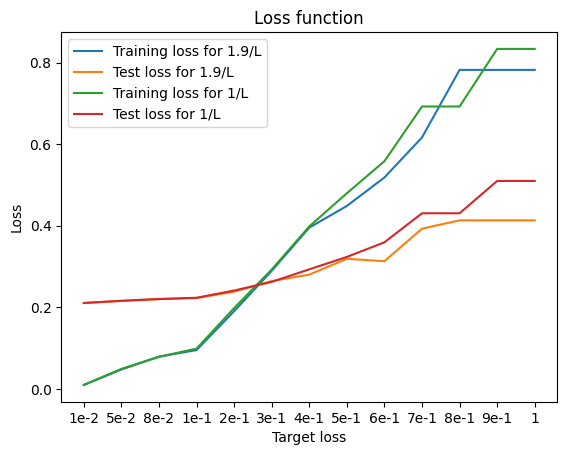

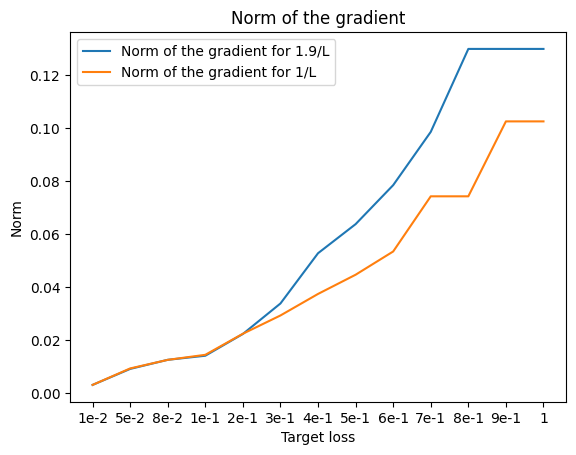

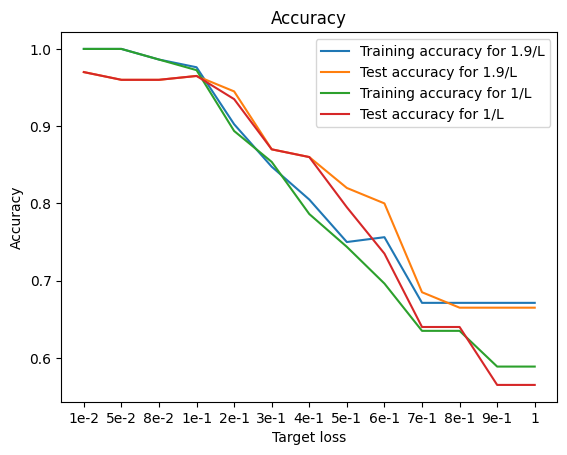

In [213]:
model = Modele(0,30)
optimiseur = Optimiseur(model)
max_iters=2000
targets = [1e-2,5e-2,8e-2,1e-1,2e-1,3e-1,4e-1,5e-1,6e-1,7e-1,8e-1,9e-1,1]
n= len(targets)
criterion='loss'
np.random.seed(0)
initializations = [np.random.randn(X_train.shape[0]) for _ in range(10)]
training_loss_mean = np.zeros(n)
test_loss_mean = np.zeros(n)
norms_mean = np.zeros(n)
train_accuracies_mean = np.zeros(n)
test_accuracies_mean = np.zeros(n)

training_loss_mean_2 = np.zeros(n)
test_loss_mean_2 = np.zeros(n)
norms_mean_2 = np.zeros(n)
train_accuracies_mean_2 = np.zeros(n)
test_accuracies_mean_2 = np.zeros(n)

for i in range(1):
    init= initializations[i]
    L,mu = model.constante_L(X_train)
    learning_rates = np.linspace(1/L,1.99/L,11)
    
    training_loss = []
    test_loss = []
    norms = []
    train_accuracies = []
    test_accuracies = []
    training_loss_2 = []
    test_loss_2 = []
    norms_2 = []
    train_accuracies_2 = []
    test_accuracies_2 = []

    for target in targets: 
        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1.9/L, max_iters, target, criterion)
        training_loss.append(model.loss_function(X_train, y_train, alpha))
        test_loss.append(model.test_loss_function(X_train, X_test, y_test, alpha))
        norms.append(np.linalg.norm(model.gradient(X_train, y_train, alpha)))
        train_accuracies.append(model.accuracy(X_train, X_train, y_train, alpha))
        test_accuracies.append(model.accuracy(X_train, X_test, y_test, alpha))
        print(len(alpha_list))

        alpha, alpha_list = optimiseur.gradient_descent(X_train, y_train, init.copy(), 1/L, max_iters, target, criterion)
        training_loss_2.append(model.loss_function(X_train, y_train, alpha))
        test_loss_2.append(model.test_loss_function(X_train, X_test, y_test, alpha))
        norms_2.append(np.linalg.norm(model.gradient(X_train, y_train, alpha)))
        train_accuracies_2.append(model.accuracy(X_train, X_train, y_train, alpha))
        test_accuracies_2.append(model.accuracy(X_train, X_test, y_test, alpha))
        print(len(alpha_list))
    
    training_loss_mean += training_loss
    test_loss_mean += test_loss
    norms_mean += norms
    train_accuracies_mean += train_accuracies
    test_accuracies_mean += test_accuracies
    training_loss_mean_2 += training_loss_2
    test_loss_mean_2 += test_loss_2
    norms_mean_2 += norms_2
    train_accuracies_mean_2 += train_accuracies_2
    test_accuracies_mean_2 += test_accuracies_2

training_loss_mean /= 1
test_loss_mean /= 1
norms_mean /= 1
train_accuracies_mean /= 1
test_accuracies_mean /= 1
training_loss_mean_2 /= 1
test_loss_mean_2 /= 1
norms_mean_2 /= 1
train_accuracies_mean_2 /= 1
test_accuracies_mean_2 /= 1

x_array = ["1e-2","5e-2","8e-2","1e-1","2e-1","3e-1","4e-1","5e-1","6e-1","7e-1","8e-1","9e-1","1"]


plt.figure()
plt.plot(x_array,training_loss_mean, label='Training loss for 1.9/L')
plt.plot(x_array,test_loss_mean, label='Test loss for 1.9/L')
plt.plot(x_array,training_loss_mean_2, label='Training loss for 1/L')
plt.plot(x_array,test_loss_mean_2, label='Test loss for 1/L')
plt.xlabel('Target loss')
plt.ylabel('Loss')
plt.title('Loss function')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,norms_mean, label='Norm of the gradient for 1.9/L')
plt.plot(x_array,norms_mean_2, label='Norm of the gradient for 1/L')
plt.xlabel('Target loss')
plt.ylabel('Norm')
plt.title('Norm of the gradient')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_array,train_accuracies_mean, label='Training accuracy for 1.9/L')
plt.plot(x_array,test_accuracies_mean, label='Test accuracy for 1.9/L')
plt.plot(x_array,train_accuracies_mean_2, label='Training accuracy for 1/L')
plt.plot(x_array,test_accuracies_mean_2, label='Test accuracy for 1/L')
plt.xlabel('Target loss')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()